I will start this task by importing the necessary Python libraries:

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


... and the dataset:

In [2]:
data = pd.read_csv('OnlinePaymentsFraudDetectionData/PS_20174392719_1491204439457_log.csv')
display(data.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Let`s check the type of our data:

In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


None

I'll check if this dataset has any null values or not:

In [4]:
display(data.isna().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

This dataset does not have any null values. Before moving forward, now, let’s have a look at the type of transaction mentioned in the datasetÇ

In [5]:
display(data.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [6]:
type = data['type'].value_counts()
transactions = type.index
quantity = type.values

figure = px.pie(data,
                values=quantity,
                names=transactions,
                hole=0.5,
                title='Distribuition of Transaction Type')

figure.show()

Now let’s transform the categorical features into numerical:

In [7]:
data['type'] = data['type'].map({'CASH_OUT': 1,
                                 'PAYMENT': 2,
                                 'CASH_IN': 3,
                                 'TRANSFER': 4,
                                 'DEBIT': 5})
display(data.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


I'll drop two columns with data objets that we will not use and let's have a look at the correlation between the features of the data with the isFraud column: 

In [8]:
data = data.drop(['nameOrig', 'nameDest'], axis=1)
correlation = data.corr()
display(correlation['isFraud'].sort_values(ascending=False))


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.016171
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

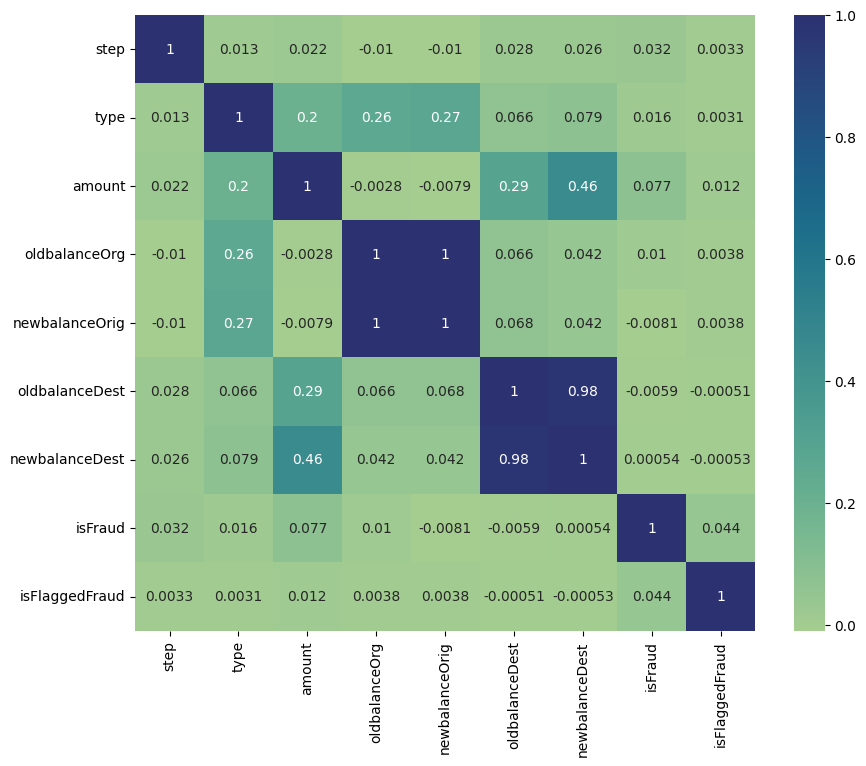

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=data.corr(),
            cmap='crest',
            annot=True)
plt.show()

I will transform the values of the isFraud column into No Fraud and Fraud labels to have a better understanding of the output:

In [10]:
data['isFraud'] = data['isFraud'].map({0: 'No Fraud',
                                       1: 'Fraud'})
display(data.head())

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,No Fraud,0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,No Fraud,0
2,1,4,181.00,181.0,0.00,0.0,0.0,Fraud,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,Fraud,0
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,No Fraud,0


Now let’s train a classification model to classify fraud and non-fraud transactions. Before training the model, I will split the data into training and test sets:

In [11]:
x = np.array(data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
y = np.array(data[['isFraud']])

Now let’s train the online payments fraud detection model:

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
display(model.score(xtest, ytest))

0.9997280994307377

Now I can classify whether a transaction is a fraud or not by feeding about a transaction into the model:

In [15]:
#features = [type, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest]
features = np.array([[4, 100, 110, 110, 0, 0]])
print(model.predict(features))

['Fraud']
